In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("players_20.csv")

In [3]:
pd.options.display.max_columns = None
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

# 1. Dropping  out of scope columns

In [4]:
df.drop(["sofifa_id","player_url","short_name","long_name","dob","nationality",
         "club","value_eur","wage_eur","real_face","release_clause_eur","player_tags",
         "team_jersey_number","loaned_from", "joined", "contract_valid_until",
         "nation_jersey_number","player_traits"], axis =1, inplace=True)



# 2. Feature Preprocessing

### Positions
* player_positions: can possibly use multi label binarizer but the other categories below can  be used instead
* team_position: does not seem to follow any pattern in terms of the overall value; group the positions into broader positions and allow the model to check for possible relation
* nation_position: too many null values

In [5]:
df[['player_positions', 'team_position','nation_position' ]]

,player_positions,team_position,nation_position
0,"RW, CF, ST",RW,NaN
1,"ST, LW",LW,LS
2,"LW, CAM",CAM,LW
3,GK,GK,GK
4,"LW, CF",LW,LF
...,...,...,...
18273,CB,RES,NaN
18274,CB,SUB,NaN
18275,CM,SUB,NaN
18276,CM,SUB,NaN


In [6]:
df.drop(['player_positions'],axis=1,inplace=True)

In [7]:
df.groupby('team_position').agg({'overall': np.mean}).sort_values(by="overall")

,overall
team_position,
RES,61.231575
SUB,65.148338
LWB,66.172414
RWB,67.000000
LB,67.921429
RB,68.294643
RM,69.097744
CM,69.144737
LCB,69.171212


In [8]:
df.dropna(subset=['team_position'],inplace=True)

In [9]:
team_pos_mapper = {
    'RES': 0 , 'SUB':0, 
    'LWB': 1 , 'RWB': 1, 'LB': 1, 'RB': 1, 'CB': 1, 'LCB': 1, 'RCB': 1,
    'LM': 2, 'RM': 2, "CM": 2, 'RCM': 2, 'LCM': 2, 'RDM' :2, 'LDM': 2, 
    'CDM': 2,'CAM': 2, 'RAM': 2, 'LAM': 2,
    'CF': 3, 'LF': 3, 'RF': 3, 'ST': 3, 'RW':3, 'LW':3, 'LS': 3, 'RS': 3,
    'GK': 4
}

In [10]:
df['team_position'] = df['team_position'].map(team_pos_mapper)

In [11]:
df = pd.get_dummies(df,columns=['team_position'],drop_first=True)

In [12]:
df['nation_position'].isnull().sum()

17152

In [13]:
17152/ len(df)

0.9508814724470562

In [14]:
df.drop(['nation_position'],axis=1,inplace=True)

### preferred_foot

In [15]:
df['preferred_foot'].unique()

array(['Left', 'Right'], dtype=object)

In [16]:
df['preferred_foot'].isnull().sum()

0

In [17]:
pref_foot_map = {'Left':0, 'Right':1}
df['preferred_foot'] = df['preferred_foot'].map(pref_foot_map)

### work_rate

In [18]:
df['work_rate'].value_counts()

Medium/Medium    9744
High/Medium      3183
Medium/High      1689
High/High         976
Medium/Low        869
High/Low          674
Low/Medium        456
Low/High          413
Low/Low            34
Name: work_rate, dtype: int64

In [19]:
df['attack_work_rate'] = df['work_rate'].apply(lambda x: x.strip()).apply(lambda x: x.split('/')[0])
df['attack_work_rate'] = df['attack_work_rate'].map({"Low":0, "Medium":1, "High":2})

df['defense_work_rate'] = df['work_rate'].apply(lambda x: x.strip()).apply(lambda x: x.split('/')[1])
df['defense_work_rate'] = df['defense_work_rate'].map({"Low":0, "Medium":1, "High":2})

df.drop(['work_rate'], axis=1, inplace=True)


### body_type

In [20]:
df['body_type'].value_counts()

Normal                 10590
Lean                    6444
Stocky                   997
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Messi                      1
Akinfenwa                  1
Courtois                   1
C. Ronaldo                 1
Neymar                     1
Name: body_type, dtype: int64

In [21]:
def encode_body_type(body_type):
    if body_type.strip() =="Stocky":
        return 0
    elif body_type.strip() =="Normal":
        return 1
    elif body_type.strip() =="Lean":
        return 2
    else:
        return np.nan

In [22]:
df['body_type'] = df['body_type'].apply(encode_body_type)

In [23]:
df.dropna(subset=['body_type'],inplace=True)

In [24]:
df['body_type'] = df['body_type'].apply(lambda x: int(x))

### Player Stats

In [25]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'body_type', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_stan

In [26]:
stats = [ 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

In [27]:
df[stats].isnull().sum().sort_values(ascending=False)[:45]

gk_kicking                 16036
gk_speed                   16036
gk_diving                  16036
gk_handling                16036
gk_positioning             16036
gk_reflexes                16036
lw                          1995
rs                          1995
st                          1995
ls                          1995
rcb                         1995
rb                          1995
cf                          1995
physic                      1995
defending                   1995
dribbling                   1995
passing                     1995
shooting                    1995
lf                          1995
pace                        1995
rf                          1995
rdm                         1995
rw                          1995
cm                          1995
lcm                         1995
rcm                         1995
lwb                         1995
ldm                         1995
cdm                         1995
rm                          1995
rwb       

In [28]:
16036 / len(df)

0.8893572181243414

In [29]:
df.drop([ 'gk_diving', 'gk_handling','gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'], axis=1,inplace=True)

In [30]:
1995 / len(df)

0.11064278187565858

In [31]:
df['pace'] = df['pace'].fillna(df['pace'].median())
df['shooting'] = df['shooting'].fillna(df['shooting'].median())
df['passing'] = df['passing'].fillna(df['passing'].median())
df['dribbling'] = df['dribbling'].fillna(df['dribbling'].median())
df['defending'] = df['defending'].fillna(df['defending'].median())
df['physic'] = df['physic'].fillna(df['physic'].median())

In [32]:
def encode_stats(stats):
    if stats is np.nan:
        return np.nan
    else:
        only = stats.strip()
        numarr = only.split('+')
        total = int(numarr[0]) + int(numarr[1])
        return total

    

In [33]:
need_fill = ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

In [34]:
for col in need_fill:
    df[col] = df[col].apply(encode_stats)
    df[col] = df[col].fillna(df[col].median())

# 3. Feature Selection

### filter(univariate)

In [35]:
df.describe().T['std'].sort_values()

team_position_4               0.187929
team_position_3               0.251075
team_position_1               0.354416
team_position_2               0.357806
international_reputation      0.374554
                               ...    
mentality_positioning        19.555775
defending_marking            20.049499
mentality_interceptions      20.761132
defending_sliding_tackle     21.183539
defending_standing_tackle    21.556079
Name: std, Length: 82, dtype: float64

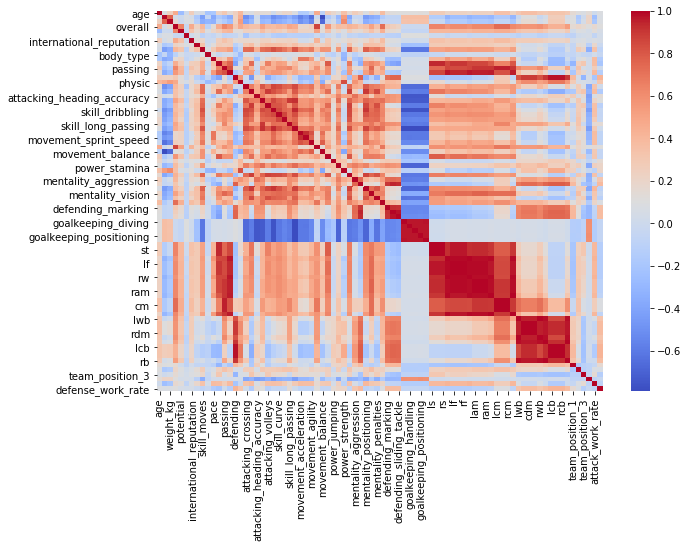

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap="coolwarm")

In [37]:
features = list(df.drop(['overall'], axis=1).columns)

In [38]:
for col in features:
    print(col,"---------",list(df.corr()[col][df.corr()[col]>.99].index))

age --------- ['age']
height_cm --------- ['height_cm']
weight_kg --------- ['weight_kg']
potential --------- ['potential']
preferred_foot --------- ['preferred_foot']
international_reputation --------- ['international_reputation']
weak_foot --------- ['weak_foot']
skill_moves --------- ['skill_moves']
body_type --------- ['body_type']
pace --------- ['pace']
shooting --------- ['shooting']
passing --------- ['passing']
dribbling --------- ['dribbling']
defending --------- ['defending']
physic --------- ['physic']
attacking_crossing --------- ['attacking_crossing']
attacking_finishing --------- ['attacking_finishing']
attacking_heading_accuracy --------- ['attacking_heading_accuracy']
attacking_short_passing --------- ['attacking_short_passing']
attacking_volleys --------- ['attacking_volleys']
skill_dribbling --------- ['skill_dribbling']
skill_curve --------- ['skill_curve']
skill_fk_accuracy --------- ['skill_fk_accuracy']
skill_long_passing --------- ['skill_long_passing']
skill_ba

In [39]:
features = list(df.drop(['overall','ls','rs','lw','lf','rf','lam','ram',
                        'lm','lcm','rcm','lwb','ldm','rdm','lb','lcb',
                        'rcb'], axis=1).columns)


In [40]:
target = 'overall'

# 4. Model 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df[features]
y = df[target] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [44]:
rf = RandomForestRegressor().fit(X_train,y_train)
gb = GradientBoostingRegressor().fit(X_train,y_train)


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
rf_score = cross_val_score(rf,X_train,y_train,cv=4,scoring="neg_root_mean_squared_error").mean()

In [47]:
rf_score

-0.856690334541315

In [48]:
gb_score = cross_val_score(gb,X_train,y_train,cv=4,scoring="neg_root_mean_squared_error").mean()

In [49]:
gb_score

-1.2101732995056902

### embedded method

In [50]:
embedded =pd.DataFrame(rf.feature_importances_ *100, columns=['random forest'])

In [51]:
embedded['columns'] = features

In [52]:
embedded.sort_values(by="random forest", ascending=True).head(50)

,random forest,columns
62,0.000847,team_position_4
61,0.001343,team_position_3
59,0.002021,team_position_1
60,0.003748,team_position_2
4,0.004419,preferred_foot
64,0.004828,defense_work_rate
7,0.005004,skill_moves
63,0.007099,attack_work_rate
8,0.007255,body_type
6,0.009830,weak_foot


In [53]:
drop_embed = list(embedded.sort_values(by="random forest", ascending=True)['columns'][:47])

In [54]:
rf_score = cross_val_score(rf,X_train.drop(drop_embed,axis=1),y_train,cv=4,scoring="neg_root_mean_squared_error").mean()

In [55]:
rf_score

-0.8277110680573772

In [56]:
features = list(X_train.drop(drop_embed,axis=1).columns)

# 5. Model Tuning

In [57]:
def scorer(model):
    return cross_val_score(model,X_train[features],y_train,cv=3,
                           scoring="neg_root_mean_squared_error").mean()

import time
from random import randint
time_limit = 600
t0 = time.time()
all_score = []
while True:
    a = randint(227, 345)
    b = randint(3, 7) / 10
    c = len(features)
    d = [True, False][randint(0, 1)]
    model = RandomForestRegressor(n_estimators=a, max_features=b, max_depth=c, bootstrap=d)
    cvscore = scorer(model)
    hpnscore = {'a' : a, 'b' : b, 'c' : c, 'd' : d, 
             'cvscore' : cvscore}
    all_score.append(hpnscore)
    passed = time.time() - t0
    print('{:1.2f}%'.format(passed/600))
    if passed >= time_limit : break
result_set = pd.DataFrame(all_score)

0.03%
0.06%
0.12%
0.16%
0.20%
0.23%
0.27%
0.33%
0.39%
0.45%
0.49%
0.53%
0.56%
0.60%
0.63%
0.68%
0.71%
0.73%
0.78%
0.81%
0.86%
0.89%
0.94%
0.97%
1.04%


In [58]:
result_set.sort_values(by="cvscore",ascending=False)

,a,b,c,d,cvscore
4,305,0.4,18,False,-0.753358
15,342,0.4,18,False,-0.753385
20,318,0.4,18,False,-0.753741
19,271,0.4,18,False,-0.754652
7,323,0.6,18,False,-0.754704
11,263,0.4,18,False,-0.754854
2,330,0.6,18,False,-0.755193
9,342,0.6,18,False,-0.757114
5,260,0.3,18,False,-0.772419
10,341,0.3,18,False,-0.772645


In [59]:
final_model = RandomForestRegressor(
                n_estimators= 302,
                max_features= 0.5,
                max_depth = 18,
                bootstrap = False
                )

In [60]:
final_model.fit(X_train[features],y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=302, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
np.sqrt(mean_squared_error(y_test,final_model.predict(X_test[features])))

0.7187177229657817

In [63]:
import pickle
pickle.dump(final_model, open("saved_model.pickle", 'wb'))


pickle.load(open("saved_model.pickle",'rb'))